In [20]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/db/0d/1f6d2cd52c886707b00ddb7ed2504cbf10903a60a7bebcd71f0f77d53505/scikit_learn-1.3.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 21.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.6 MB/

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
#df=pd.read_csv ("Dataset/complete.csv")
#not useful

In [2]:
dfs = []
for f in ['00', '10']:
    df=pd.read_csv(f"./Dataset/Songs_1960s_to_2010s/dataset-of-{f}s.csv")
    dfs.append(df)
df_merged = pd.concat(dfs)

In [3]:
df_merged.groupby(['artist', 'target'], as_index=False)['uri'].count().sort_values('uri', ascending=False)

artist  target  uri
4949                                  Taylor Swift       1   52
2006                                     Glee Cast       1   52
1493                                         Drake       1   51
2785                                 Kenny Chesney       1   39
5293                                    Tim McGraw       1   35
...                                            ...     ...  ...
2796                                  Kenny Rogers       1    1
2797  Kenny Rogers With Alison Krauss & Billy Dean       1    1
2798                          Kenny Wayne Shepherd       0    1
2800                                    Kent Jones       1    1
853                                           CLSM       0    1

[5877 rows x 3 columns]

In [41]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/1d/77/5e660d211906becd9f8e13e00d828f5e68b5e66d9b956f4646bb4882c68e/scipy-1.11.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached scipy-1.11.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (54 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 4.7 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Loading dataset

In [5]:
dfs = []
for f in ['00', '10']:
    df=pd.read_csv(f"./Dataset/Songs_1960s_to_2010s/dataset-of-{f}s.csv")
    dfs.append(df)
df_merged = pd.concat(dfs)
df_with_numerical_features = df_merged[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target']]

# Analyses

## Distribution of features

To check the range of features' value and their distribution

In [6]:
df_merged.describe()

danceability        energy           key      loudness          mode  \
count  12270.000000  12270.000000  12270.000000  12270.000000  12270.000000   
mean       0.556088      0.680560      5.280114     -7.522540      0.645314   
std        0.190986      0.239687      3.586004      5.172085      0.478438   
min        0.058800      0.000251      0.000000    -47.327000      0.000000   
25%        0.432000      0.548000      2.000000     -8.375000      0.000000   
50%        0.573000      0.727000      5.000000     -6.069500      1.000000   
75%        0.697000      0.871000      8.000000     -4.585000      1.000000   
max        0.986000      0.999000     11.000000      1.137000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  12270.000000  12270.000000      12270.000000  12270.000000   
mean       0.095310      0.215706          0.158413      0.196432   
std        0.096203      0.296671          0.310655      0.164153   
min        0.022400      0.000000          0.000000      0.016700   
25%        0.037325      0.006072          0.000000      0.095300   
50%        0.055100      0.063200          0.000019      0.128000   
75%        0.109000      0.312000          0.051150      0.257000   
max        0.956000      0.996000          0.998000      0.987000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  12270.000000  12270.000000  1.227000e+04    12270.000000  12270.000000   
mean       0.462172    121.999324  2.469773e+05        3.922820     40.887651   
std        0.250751     30.008028  1.151325e+05        0.390605     19.895327   
min        0.000000     39.369000  1.592000e+04        0.000000      0.000000   
25%        0.258000     97.699250  1.993870e+05        4.000000     27.824750   
50%        0.455000    120.082500  2.288465e+05        4.000000     36.175345   
75%        0.659000    141.316000  2.692170e+05        4.000000     48.157528   
max        0.982000    213.233000  4.170227e+06        5.000000    262.615400   

           sections       target  
count  12270.000000  12270.00000  
mean      10.670823      0.50000  
std        4.841202      0.50002  
min        1.000000      0.00000  
25%        8.000000      0.00000  
50%       10.000000      0.50000  
75%       12.000000      1.00000  
max      169.000000      1.00000

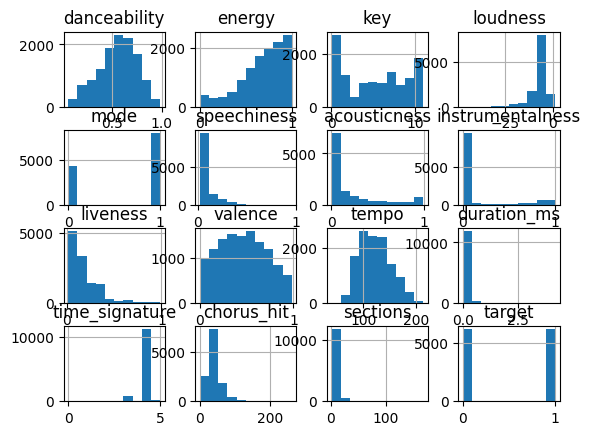

In [7]:
_ = df_merged.hist()

To see the distribution of features based on the target:

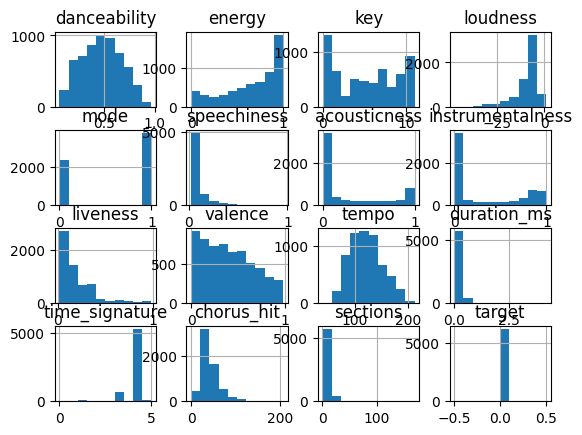

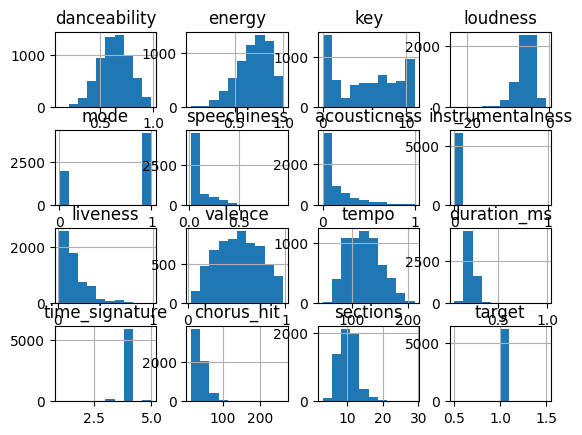

In [8]:
_ = df_merged.groupby('target').hist()

danceability


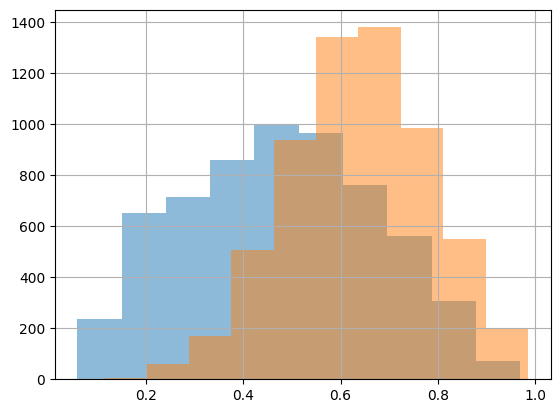

energy


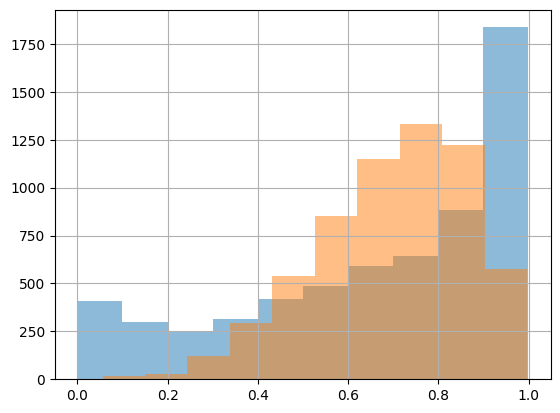

key


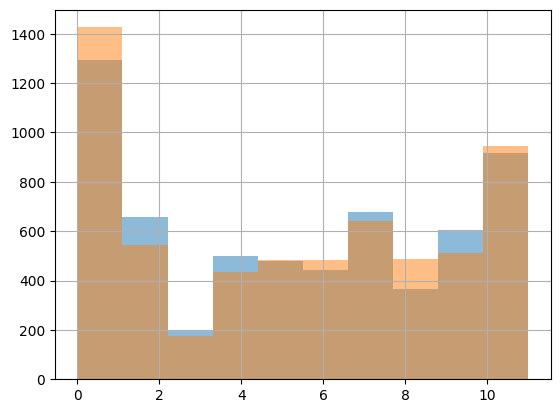

loudness


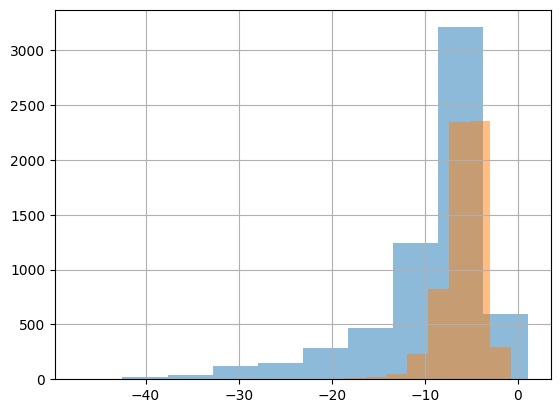

mode


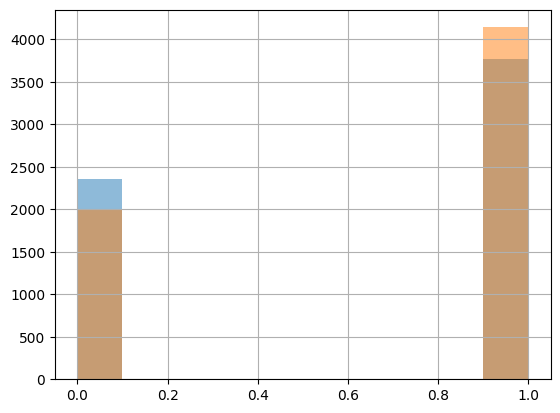

speechiness


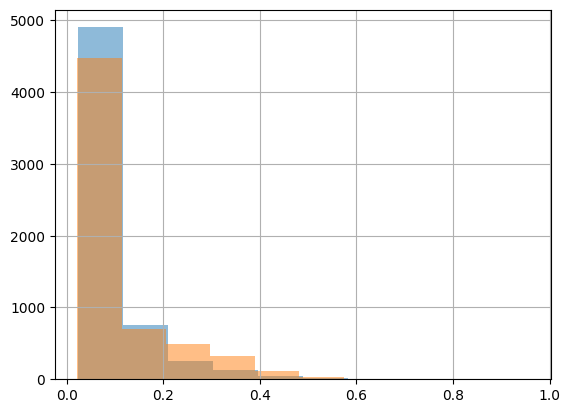

acousticness


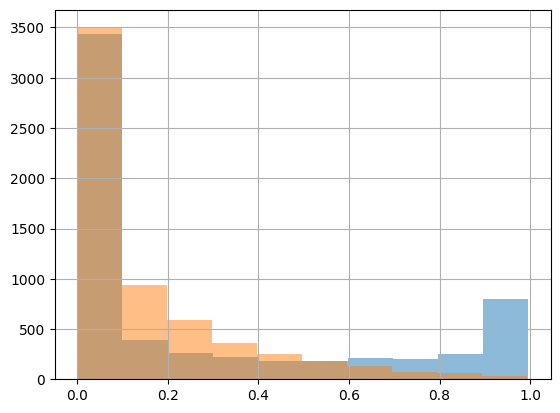

instrumentalness


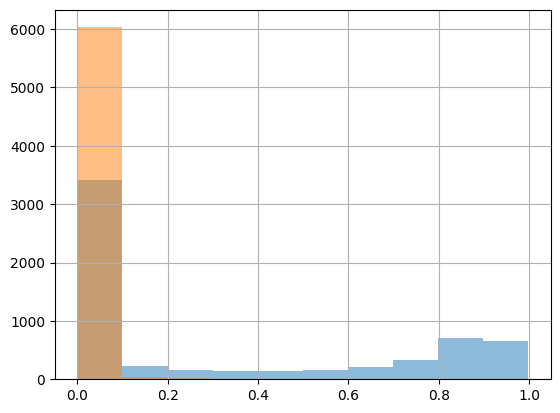

liveness


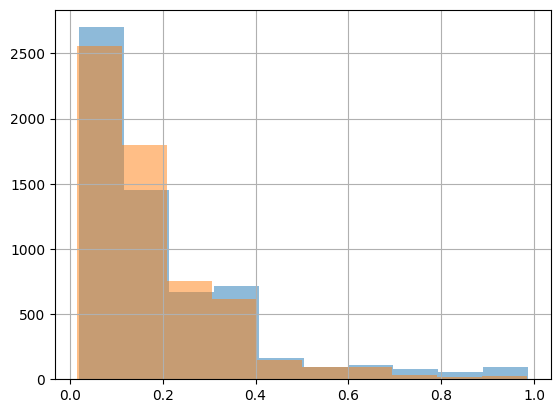

valence


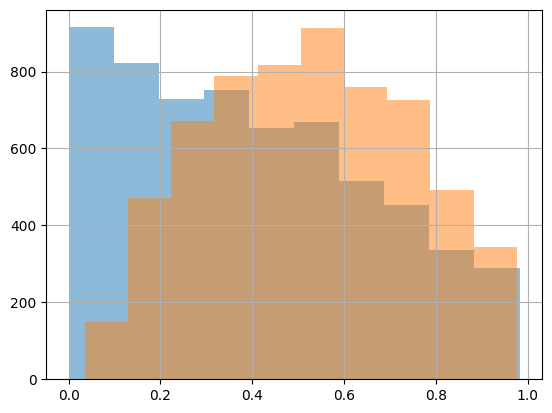

tempo


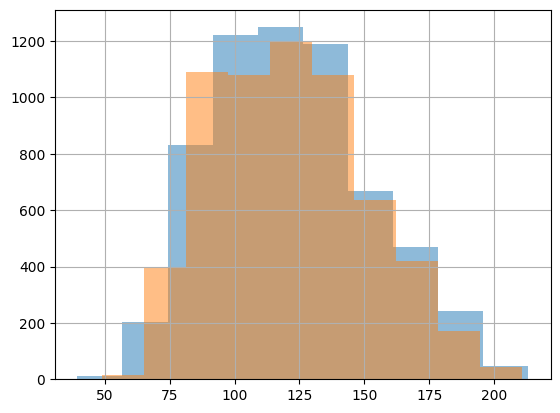

duration_ms


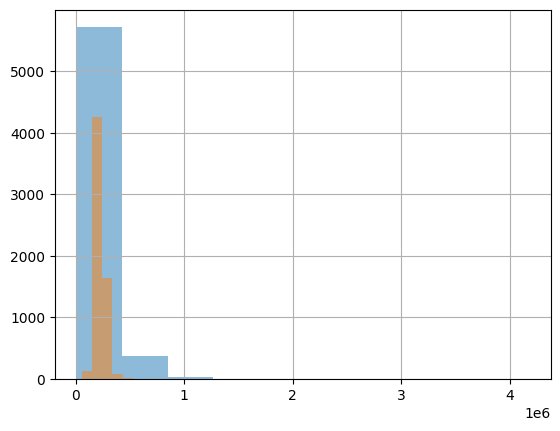

time_signature


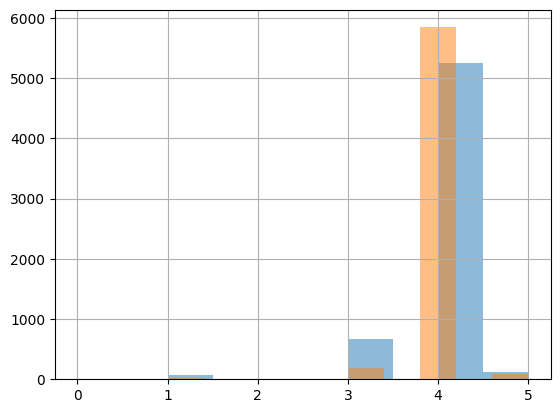

chorus_hit


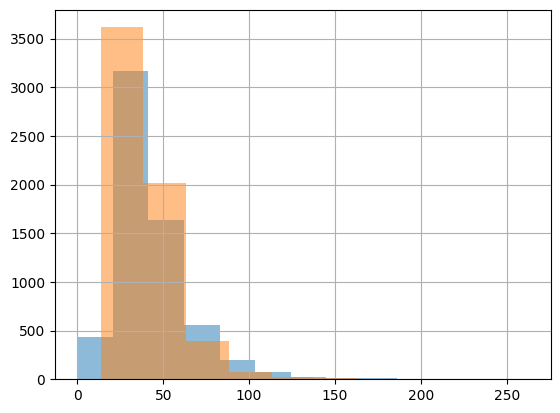

sections


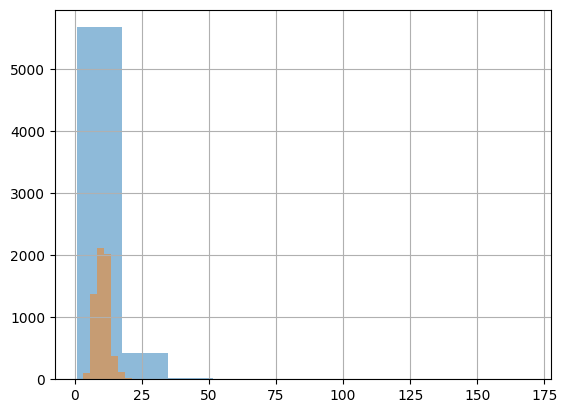

In [9]:
for feature in df_with_numerical_features.columns:
    if feature == 'target':
        continue
    print(feature)
    _ = df_merged.groupby('target')[feature].hist(alpha=0.5)
    plt.show()

## Corrolation of features

This to find out more about the features, and whether there are duplicate features (if two features have a very high corrolation, we can remove one as they bring no useful information)

<Axes: >

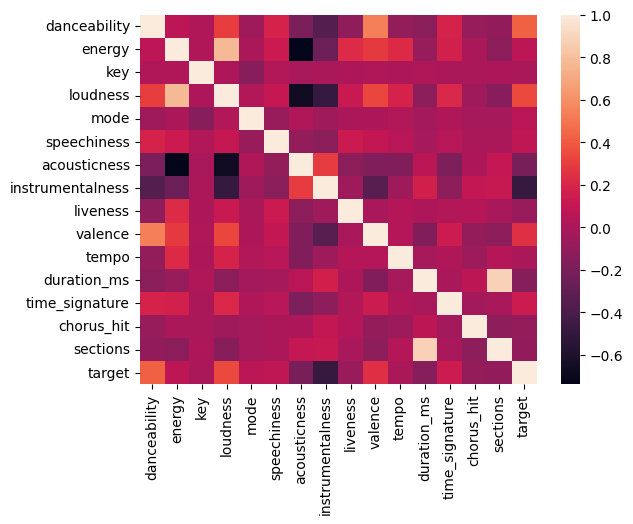

In [10]:
sns.heatmap(df_with_numerical_features.corr())

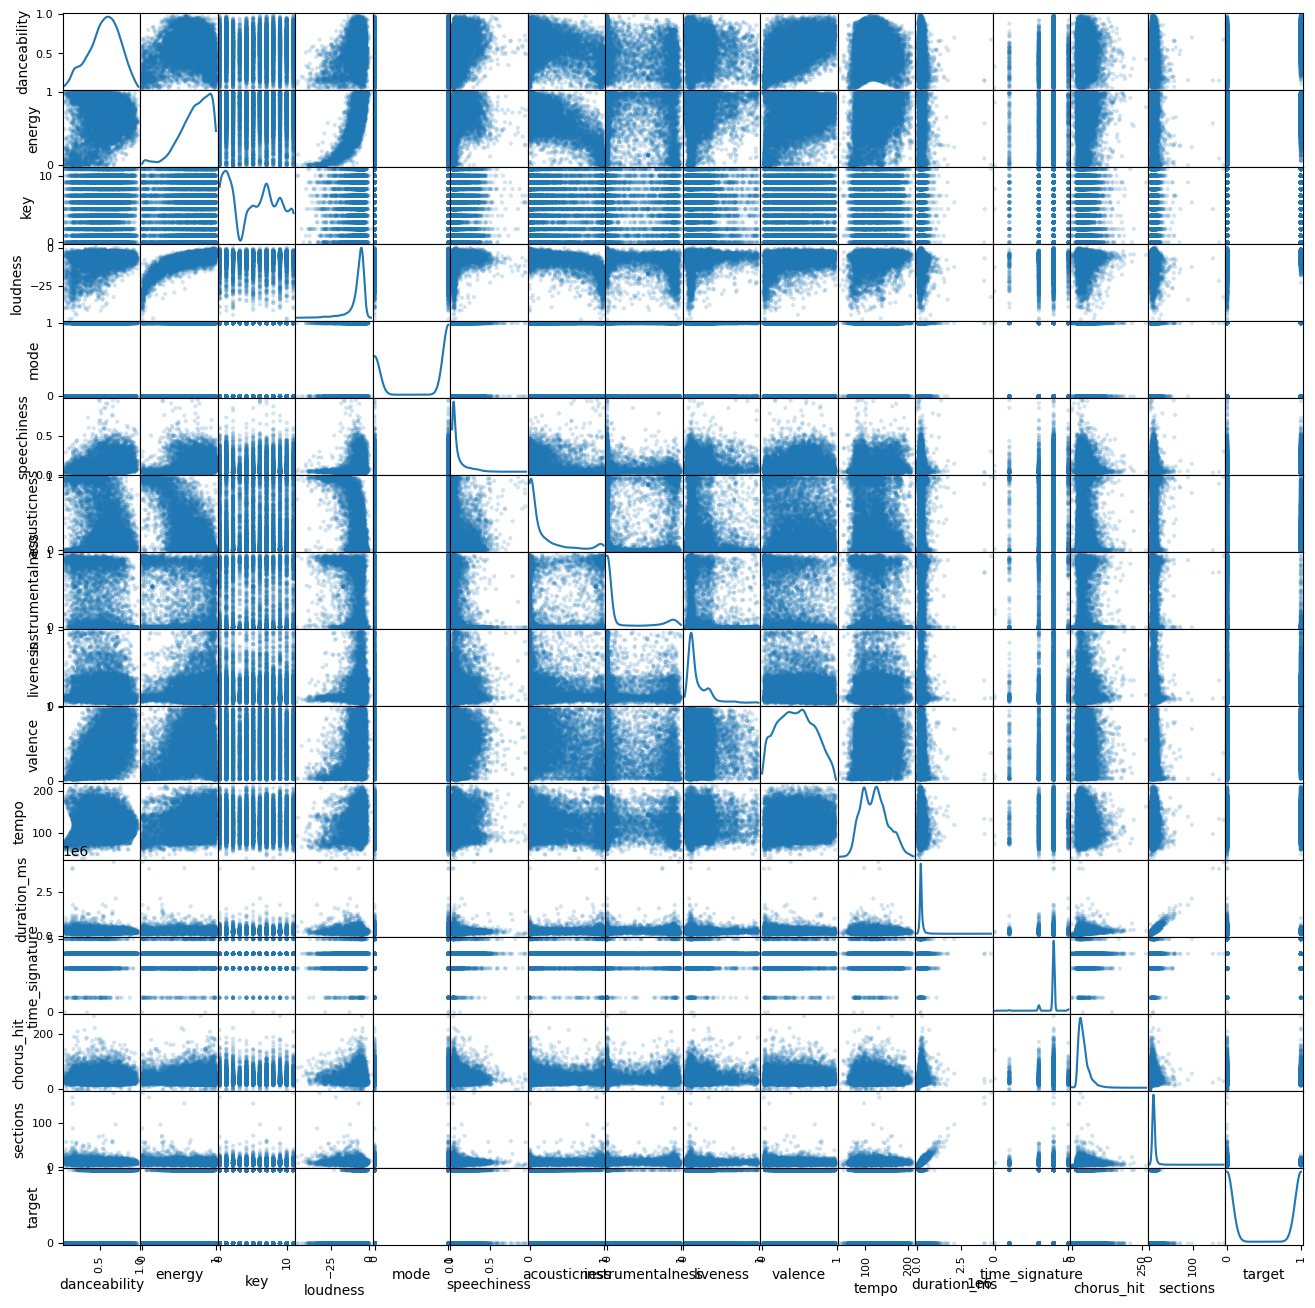

In [11]:
_ = pd.plotting.scatter_matrix(df_merged, alpha=0.2, figsize=(16, 16), diagonal='kde')

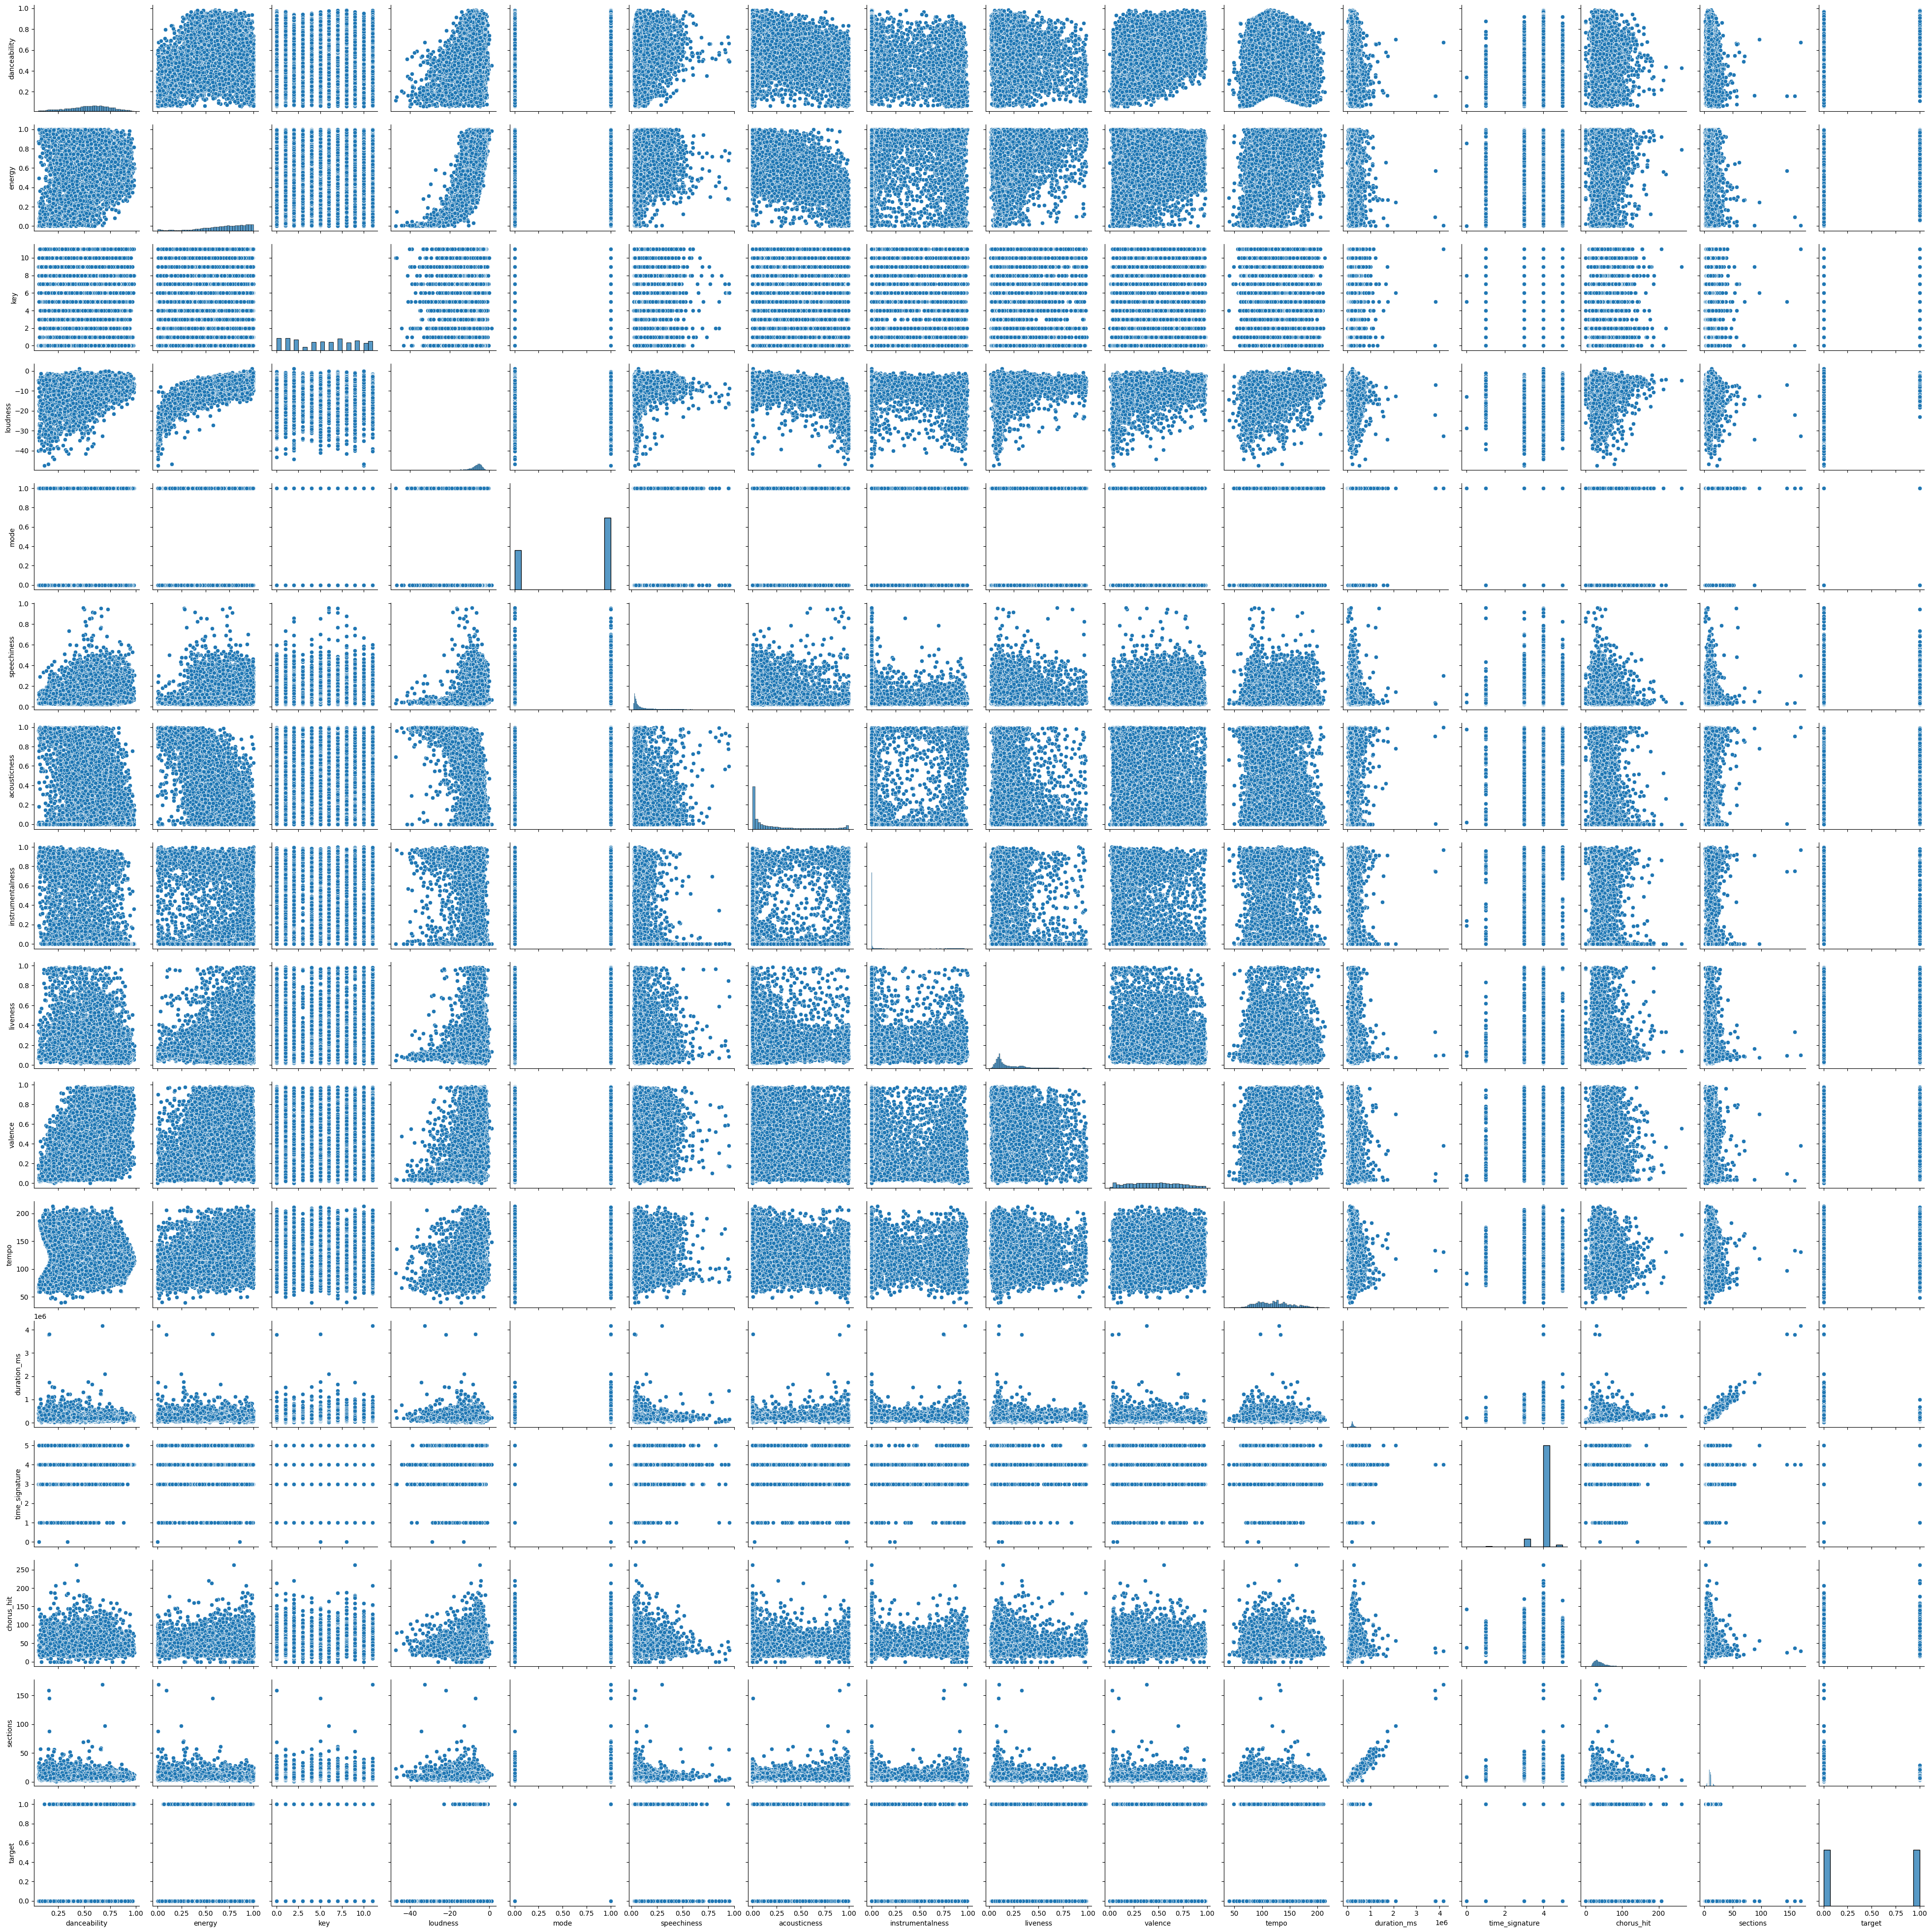

In [12]:
_ = sns.pairplot(df_with_numerical_features)

Now it's time to build the model.

In [14]:
from sklearn import tree #for now we are using a decision tree

clf = tree.DecisionTreeClassifier()

X = df_with_numerical_features[df_with_numerical_features.columns[0:-1]] #This is what the predictions are based on (the values that influence the outcome)
Y = df_with_numerical_features['target'] #This is the target value. In our case, it's either 1 or 0 and the model wil predict it based on the X-values.

from sklearn.model_selection import train_test_split #We're going to use this to split the dataset into two parts: one to train the model and one to test it.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30) #Now we have an X and a Y for training and for testing, the training set is 70% of the original dataset, the testing part 30%.

clf = clf.fit(X_train, Y_train) #Now we train the model with 70% of the used dataset.

In [29]:
predictions = clf.predict(X_test) #Now let's see what the model is going to predict if we feed it the remaining 30%.

In [43]:
prediction_df = pd.DataFrame(predictions, columns=['predictions']) #Now we create a dataframe of all the predictions the model makes based on it's training and the test set.
prediction_df['target'] = list(Y_test) #Now we add in a column of the actual target value (not the predicted one), this way we can test the accuracy.
prediction_df['equal'] = prediction_df['predictions'] == prediction_df['target'] #Now we add in a column that tells us if the prediction is equal to the actual target value (now we can test the accuracy).

In [44]:
prediction_df.groupby('equal').agg(cnt=('target', 'count')) #This way we can see how many true and false predictions were made. That's what agg does. It basically counts all 1s and 0s in the equal column, shows the sums of the true and the false and removes the other columns.

cnt
equal      
False   874
True   2807

In [42]:
prediction_df['predictions'] = 0 #Now we are going to make all the predictions 0 to calculate the baseline.
prediction_df['equal'] = prediction_df['predictions'] == prediction_df['target']
prediction_df.groupby('equal').agg(cnt=('target', 'count'))

cnt
equal      
False  1856
True   1825

In [40]:
1825 / len(prediction_df) #This calculates the baseline accuracy of this model.

0.49578918772072805

In [36]:
2807 / len(prediction_df) #This calculates the accuracy of the model by dividing the true by the length of the entire list.

0.7625645205107308

The baseline accuracy is 49.6% approximately and the actual accuracy is 76.3% approximately, that's significantly lower than the model with the other dataset.

Now let's check out the tree itself. (It's not gonna be clear, as all the blocks are gonna be tiny and there's no way to make them readable, I've tried different figsizes, this is the clearest one I could get)

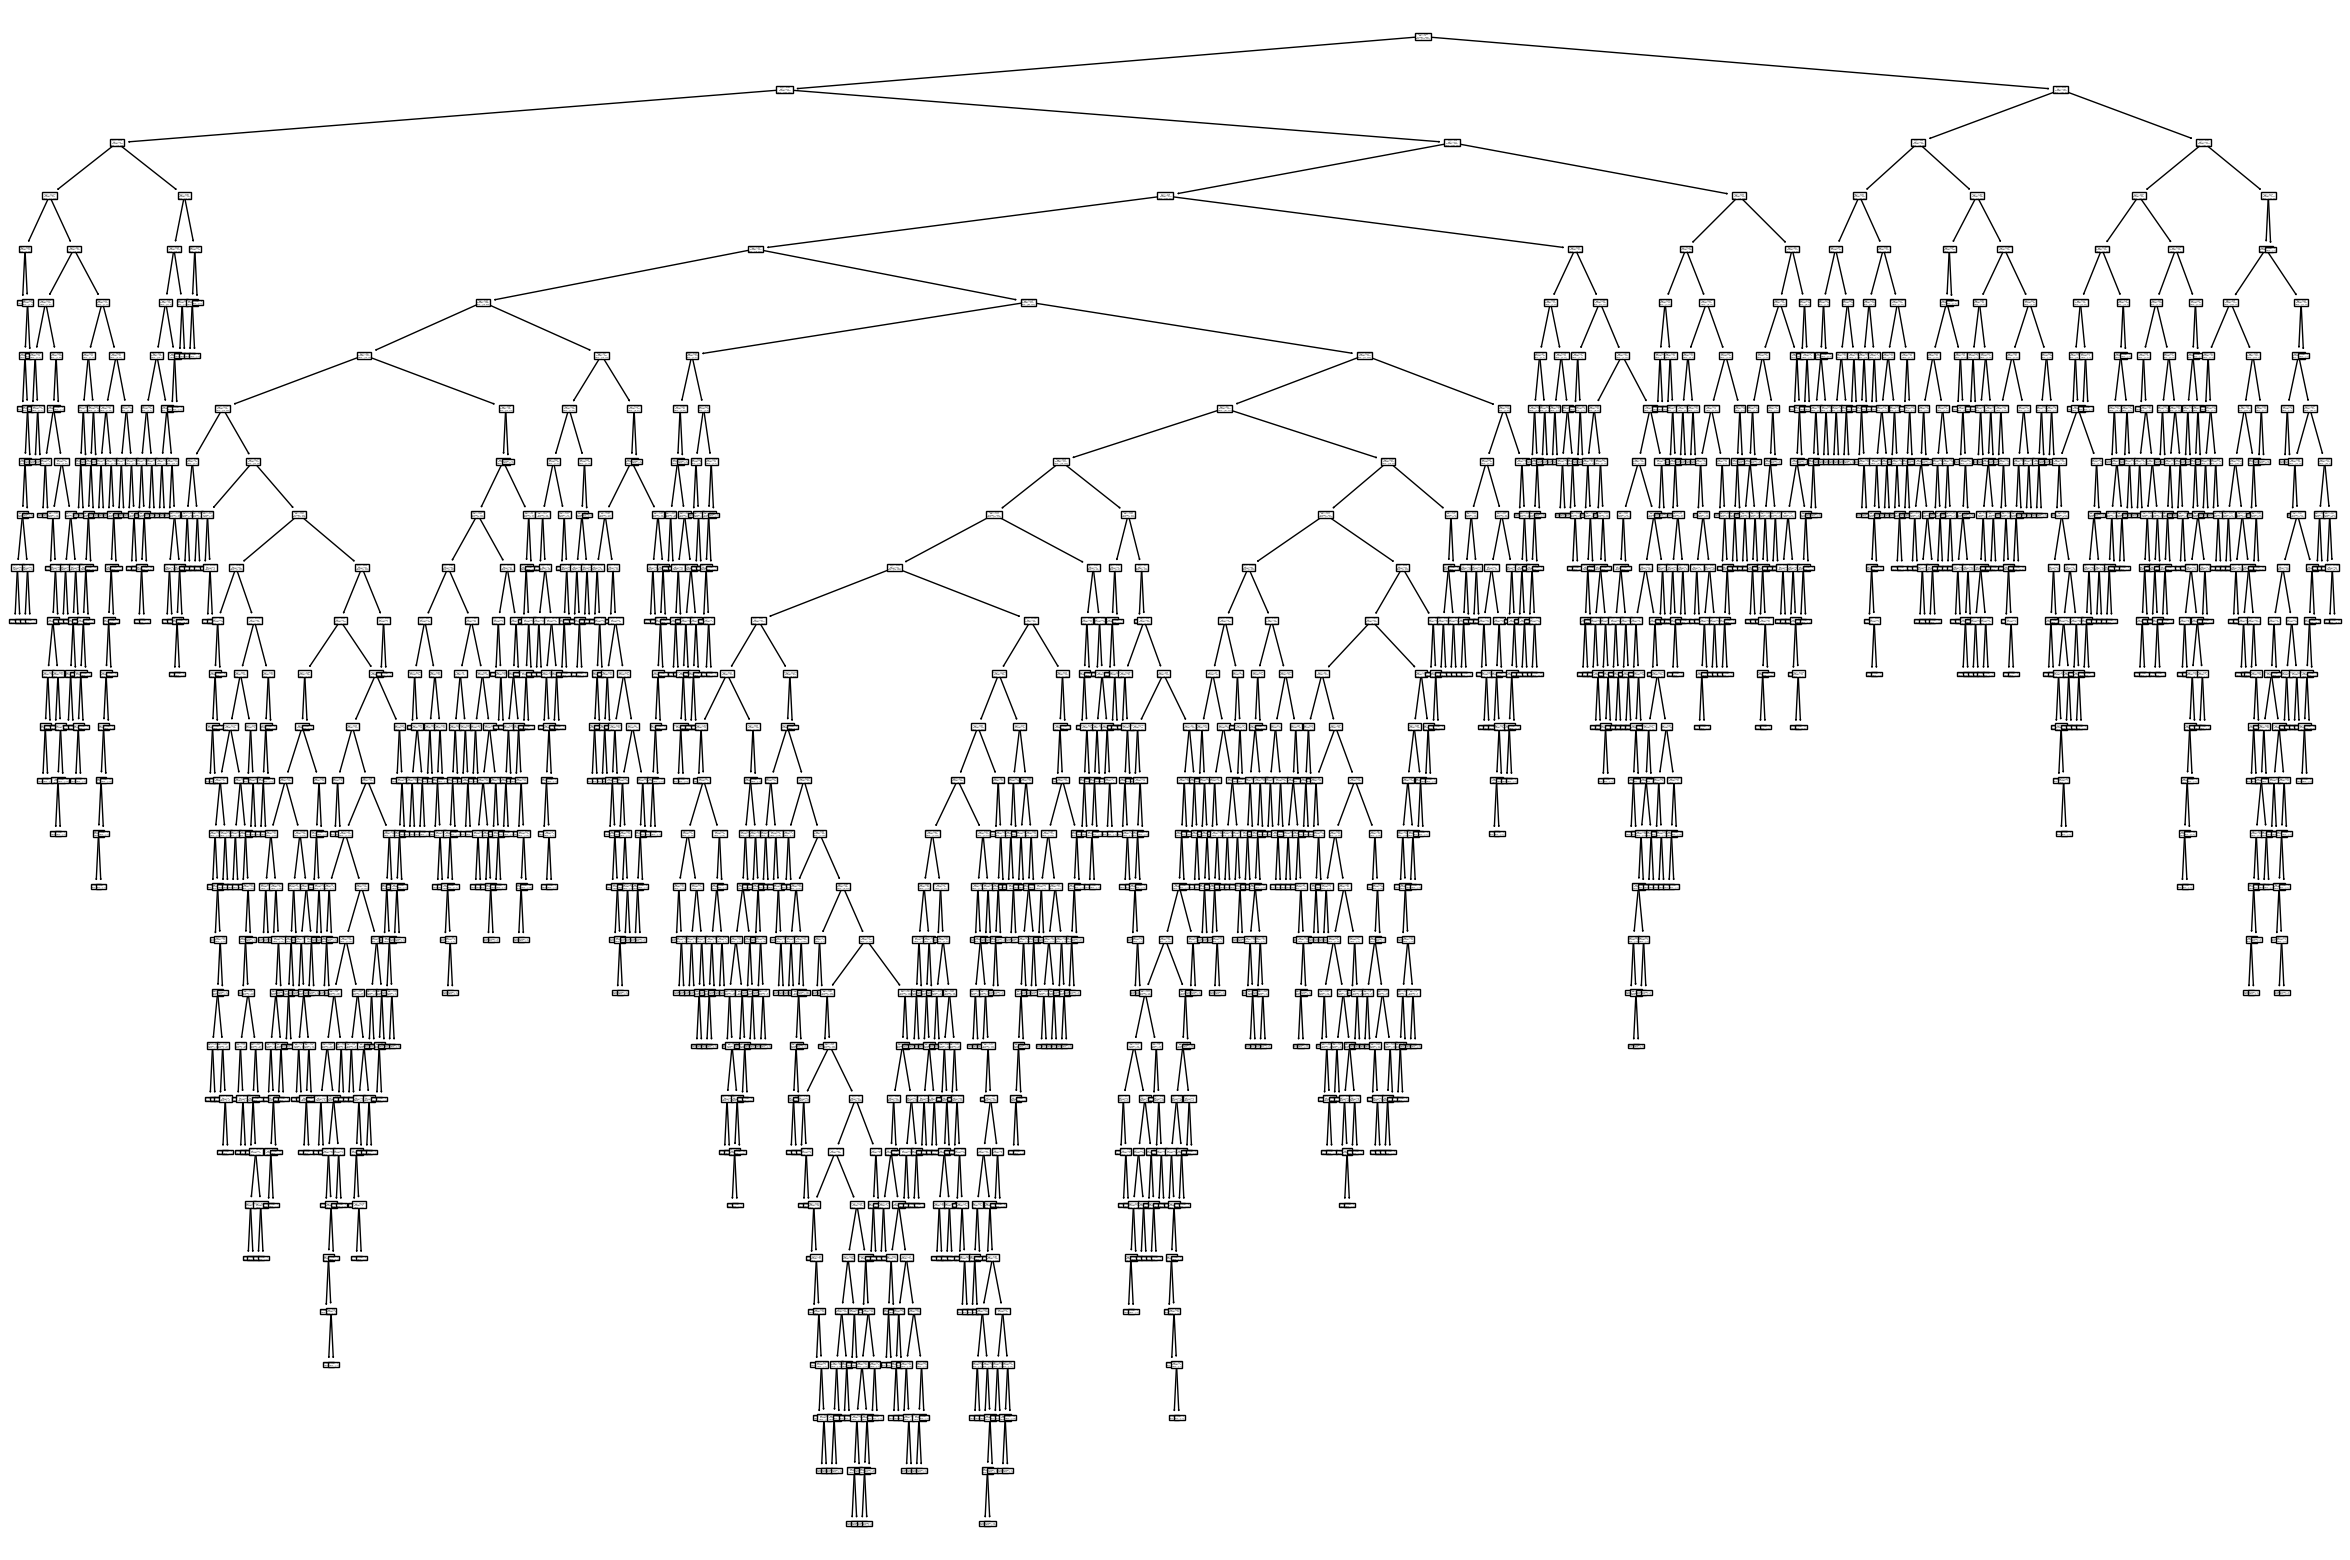

In [55]:
plt.figure(figsize=(30, 20)) 

_ = tree.plot_tree(clf)